In [ ]:
import pandas as pd
import numpy as np

# Create a random number generator that will be used to set the randomness
rng = np.random.RandomState(0)


def generate_data(n_samples=300):
    """Generate synthetic dataset. Returns `data_train`, `data_test`,
    `target_train`."""
    x_max, x_min = 1.4, -1.4
    len_x = x_max - x_min
    x = rng.rand(n_samples) * len_x - len_x / 2
    noise = rng.randn(n_samples) * 0.3
    y = x ** 3 - 0.5 * x ** 2 + noise

    data_train = pd.DataFrame(x, columns=["Feature"])
    data_test = pd.DataFrame(np.linspace(x_max, x_min, num=300),
                             columns=["Feature"])
    target_train = pd.Series(y, name="Target")

    return data_train, data_test, target_train


X_train, X_test,y_train = generate_data()

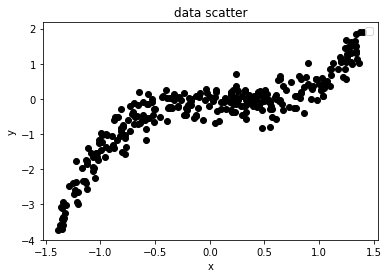

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#print(X_train)

plt.scatter(x=X_train, y=y_train, color="black")
plt.title('data scatter')
plt.xlabel('x')
plt.ylabel('y') 
plt.legend() 
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor


clf = DecisionTreeRegressor(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_pred= clf.predict(X_test)

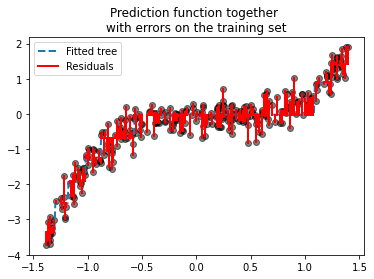

In [ ]:
# plot the data
plt.scatter(x=X_train, y=y_train, color="black",alpha=0.5)
# plot the predictions
line_predictions = plt.plot(X_test, y_pred, "--",linewidth = 2)

# plot the residuals
for value, true, predicted in zip(X_train["Feature"],
                                  y_train,
                                  y_train_pred):
    lines_residuals = plt.plot([value, value], [true, predicted], color="red",linewidth = 2)

plt.legend([line_predictions[0], lines_residuals[0]],
           ["Fitted tree", "Residuals"])
_ = plt.title("Prediction function together \nwith errors on the training set")